<a href="https://colab.research.google.com/github/jcs-27/Course-Effectiveness-Analysis/blob/main/Course_Effectiveness_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate a synthetic dataset in CSV format for 20,000 course enrollments in an online education platform with columns like course_id, student_id, enrollment_date, completion_status (0/1, 25% dropout rate), course_rating (1-5, skewed toward 3-4), course_duration (weeks), enrollment_fee, student_satisfaction_score, and course_category (e.g., STEM/Humanities), including 10% missing values, outliers (e.g., unrealistic course_duration), inconsistent category names (e.g., ‘STEM’ vs. ‘ScienceTech’), and seasonal enrollment patterns (e.g., fall spikes). Provide Python code using Pandas and Faker, saved as "course_effectiveness.csv".

## Setup

### Subtask:
Install necessary libraries (Pandas, Faker).


**Reasoning**:
Install necessary libraries pandas and Faker.



In [ ]:
%pip install pandas faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00


## Data generation

### Subtask:
Generate the base dataset with 20,000 rows and specified columns using Faker and Pandas.


**Reasoning**:
Generate the base dataset with 20,000 rows and specified columns using Faker and Pandas as per the instructions.



In [ ]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

def generate_enrollment_data():
    course_id = fake.uuid4()
    student_id = fake.uuid4()
    enrollment_date = fake.date_between(start_date='-2y', end_date='today')
    completion_status = random.choices([0, 1], weights=[0.25, 0.75], k=1)[0]
    course_rating = random.choices([1, 2, 3, 4, 5], weights=[0.05, 0.1, 0.3, 0.4, 0.15], k=1)[0]
    course_duration = random.randint(1, 20)
    enrollment_fee = round(random.uniform(50, 500), 2)
    student_satisfaction_score = random.randint(1, 5)
    course_category = random.choice(['STEM', 'Humanities', 'Business', 'Arts'])

    return {
        'course_id': course_id,
        'student_id': student_id,
        'enrollment_date': enrollment_date,
        'completion_status': completion_status,
        'course_rating': course_rating,
        'course_duration': course_duration,
        'enrollment_fee': enrollment_fee,
        'student_satisfaction_score': student_satisfaction_score,
        'course_category': course_category
    }

data = [generate_enrollment_data() for _ in range(20000)]
df = pd.DataFrame(data)
display(df.head())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1,3,9,377.10,4,Arts
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,2025-04-17,1,5,3,497.59,2,Humanities
2,7b7d2553-e2db-42f3-9150-1743d807d345,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1,3,3,67.63,5,STEM
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0,2,12,224.00,5,STEM
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-02,1,4,6,444.70,2,Humanities


## Incorporate characteristics

### Subtask:
Introduce missing values (10%), outliers (unrealistic course_duration), inconsistent category names, and seasonal enrollment patterns.


**Reasoning**:
Introduce missing values, outliers, inconsistent category names, and seasonal enrollment patterns as requested in the subtask instructions.



In [ ]:
import numpy as np

# 1. Introduce missing values (10%)
for col in df.columns:
    missing_indices = df.sample(frac=0.1, replace=False).index
    df.loc[missing_indices, col] = np.nan

# 2. Introduce outliers in 'course_duration'
outlier_indices = df.sample(frac=0.01, replace=False).index
df.loc[outlier_indices, 'course_duration'] = np.random.randint(100, 500, size=len(outlier_indices))

# 3. Introduce inconsistent category names in 'course_category'
df['course_category'] = df['course_category'].replace('STEM', 'ScienceTech')

# 4. Modify 'enrollment_date' for seasonal patterns (e.g., fall)
def introduce_seasonality(date):
    if date.month in [9, 10, 11]: # Fall months
        return date + timedelta(days=random.randint(0, 30)) # Slightly adjust dates within fall
    else:
        # For other months, introduce a chance to shift to fall
        if random.random() < 0.1: # 10% chance to shift to fall
             return date.replace(month=random.choice([9, 10, 11]), day=random.randint(1, 28))
        return date

df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])
df['enrollment_date'] = df['enrollment_date'].apply(introduce_seasonality)

display(df.head())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,Arts
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaT,1.0,5.0,3.0,497.59,2.0,Humanities
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,ScienceTech
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,NaN
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,Humanities


## Save to csv

### Subtask:
Save the generated DataFrame to a CSV file named 'course_effectiveness.csv'.


**Reasoning**:
Save the DataFrame `df` to a CSV file named 'course_effectiveness.csv' without writing the index.



In [ ]:
df.to_csv('course_effectiveness.csv', index=False)

## Summary:

### Data Analysis Key Findings

*   A synthetic dataset of 20,000 course enrollments was successfully generated with specified columns and characteristics using Pandas and Faker.
*   The generated dataset includes a 25% dropout rate (`completion_status` = 0) and `course_rating` skewed towards 3 and 4.
*   Data quality issues were intentionally introduced: approximately 10% missing values across columns, outliers in `course_duration`, inconsistent category names (e.g., 'ScienceTech' replacing 'STEM'), and seasonal patterns in `enrollment_date` with a tendency towards fall months.
*   The final dataset containing these characteristics and data quality issues was saved to a CSV file named `course_effectiveness.csv`.

### Insights or Next Steps

*   The generated dataset is suitable for practicing data cleaning, preprocessing, and exploratory data analysis techniques to handle missing values, outliers, inconsistencies, and temporal patterns.
*   The dataset can be used to build predictive models, for example, to predict course completion based on other features, or to analyze factors influencing student satisfaction or course ratings.


In [ ]:
%load_ext sql
%sql sqlite:///course_enrollments.db

In [ ]:
%%sql

-- Create the enrollments table
CREATE TABLE enrollments (
    course_id TEXT,
    student_id TEXT,
    enrollment_date DATE,
    completion_status INTEGER,
    course_rating INTEGER,
    course_duration INTEGER,
    enrollment_fee REAL,
    student_satisfaction_score INTEGER,
    course_category TEXT
);

-- Create index on course_id
CREATE INDEX idx_course_id ON enrollments (course_id);

-- Create index on enrollment_date
CREATE INDEX idx_enrollment_date ON enrollments (enrollment_date);

 * sqlite:///course_enrollments.db
Done.
Done.
Done.


[]

# Task
Write a Python script using Pandas to clean the course effectiveness dataset from "course_effectiveness.csv", handling 10% missing values (e.g., impute course_rating with median, course_category with mode), standardizing category names, removing outliers (e.g., course_duration > 52 weeks), and encoding categorical variables (e.g., course_category). Save the cleaned dataset as "cleaned_course_effectiveness.csv" and load into SQLite.

## Load data

### Subtask:
Load the `course_effectiveness.csv` file into a pandas DataFrame.


**Reasoning**:
Load the course_effectiveness.csv file into a pandas DataFrame and display the head and info to verify.



In [ ]:
df = pd.read_csv('course_effectiveness.csv')
display(df.head())
display(df.info())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,Arts
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,Humanities
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,ScienceTech
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,NaN
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,Humanities


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_id                   18000 non-null  object 
 1   student_id                  18000 non-null  object 
 2   enrollment_date             18000 non-null  object 
 3   completion_status           18000 non-null  float64
 4   course_rating               18000 non-null  float64
 5   course_duration             18017 non-null  float64
 6   enrollment_fee              18000 non-null  float64
 7   student_satisfaction_score  18000 non-null  float64
 8   course_category             18000 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


None

## Handle missing values

### Subtask:
Address the 10% missing values by imputing `course_rating` with the median and `course_category` with the mode.


**Reasoning**:
Impute missing values in 'course_rating' with the median and 'course_category' with the mode, then display the count of remaining missing values for these columns.



In [ ]:
# Calculate and fill missing values in 'course_rating' with the median
median_course_rating = df['course_rating'].median()
df['course_rating'].fillna(median_course_rating, inplace=True)

# Calculate and fill missing values in 'course_category' with the mode
mode_course_category = df['course_category'].mode()[0] # mode() can return multiple values, take the first
df['course_category'].fillna(mode_course_category, inplace=True)

# Display the number of remaining missing values for verification
print("Missing values remaining in 'course_rating':", df['course_rating'].isnull().sum())
print("Missing values remaining in 'course_category':", df['course_category'].isnull().sum())

Missing values remaining in 'course_rating': 0
Missing values remaining in 'course_category': 0


/tmp/ipython-input-2581085856.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['course_rating'].fillna(median_course_rating, inplace=True)
/tmp/ipython-input-2581085856.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## Standardize category names

### Subtask:
Standardize inconsistent `course_category` names (e.g., 'ScienceTech' to 'STEM').


**Reasoning**:
Identify and standardize inconsistent category names in the 'course_category' column.



In [ ]:
# Identify unique values in 'course_category' to find inconsistencies
print("Unique values before standardization:", df['course_category'].unique())

# Replace 'ScienceTech' with 'STEM' to standardize the category names
df['course_category'] = df['course_category'].replace('ScienceTech', 'STEM')

# Verify the changes by checking unique values again
print("Unique values after standardization:", df['course_category'].unique())

Unique values before standardization: ['Arts' 'Humanities' 'ScienceTech' 'Business']
Unique values after standardization: ['Arts' 'Humanities' 'STEM' 'Business']


## Remove outliers

### Subtask:
Remove outliers in `course_duration` (e.g., values greater than 52 weeks).


**Reasoning**:
Filter the DataFrame to remove rows with 'course_duration' greater than 52 weeks.



In [ ]:
df = df[df['course_duration'] <= 52]
display(df.head())
display(df.info())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,Arts
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,Humanities
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,STEM
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,Arts
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,Humanities


<class 'pandas.core.frame.DataFrame'>
Index: 17817 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_id                   16044 non-null  object 
 1   student_id                  16054 non-null  object 
 2   enrollment_date             16025 non-null  object 
 3   completion_status           16038 non-null  float64
 4   course_rating               17817 non-null  float64
 5   course_duration             17817 non-null  float64
 6   enrollment_fee              16028 non-null  float64
 7   student_satisfaction_score  16039 non-null  float64
 8   course_category             17817 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


None

## Encode categorical variables

### Subtask:
Encode the `course_category` variable (e.g., using one-hot encoding).


**Reasoning**:
Encode the course_category column using one-hot encoding and concatenate it with the original DataFrame.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_categories = encoder.fit_transform(df[['course_category']])
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['course_category']))

df = pd.concat([df.drop('course_category', axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

display(df.head())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category_Arts,course_category_Business,course_category_Humanities,course_category_STEM
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,1.0,0.0,0.0,0.0
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,0.0,0.0,1.0,0.0
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,0.0,0.0,0.0,1.0
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,1.0,0.0,0.0,0.0
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,0.0,0.0,1.0,0.0


## Save cleaned data

### Subtask:
Save the cleaned DataFrame to a new CSV file named `cleaned_course_effectiveness.csv`.


**Reasoning**:
Save the cleaned DataFrame to a CSV file named 'cleaned_course_effectiveness.csv' without writing the index.



In [ ]:
df.to_csv('cleaned_course_effectiveness.csv', index=False)

In [ ]:
import pandas as pd

df = pd.read_csv('course_effectiveness.csv')
display(df.head())
display(df.info())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,Arts
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,Humanities
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,ScienceTech
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,NaN
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,Humanities


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_id                   18000 non-null  object 
 1   student_id                  18000 non-null  object 
 2   enrollment_date             18000 non-null  object 
 3   completion_status           18000 non-null  float64
 4   course_rating               18000 non-null  float64
 5   course_duration             18017 non-null  float64
 6   enrollment_fee              18000 non-null  float64
 7   student_satisfaction_score  18000 non-null  float64
 8   course_category             18000 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


None

In [ ]:
# Calculate and fill missing values in 'course_rating' with the median
median_course_rating = df['course_rating'].median()
df['course_rating'].fillna(median_course_rating, inplace=True)

# Calculate and fill missing values in 'course_category' with the mode
mode_course_category = df['course_category'].mode()[0] # mode() can return multiple values, take the first
df['course_category'].fillna(mode_course_category, inplace=True)

# Display the number of remaining missing values for verification
print("Missing values remaining in 'course_rating':", df['course_rating'].isnull().sum())
print("Missing values remaining in 'course_category':", df['course_category'].isnull().sum())

Missing values remaining in 'course_rating': 0
Missing values remaining in 'course_category': 0


/tmp/ipython-input-2581085856.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['course_rating'].fillna(median_course_rating, inplace=True)
/tmp/ipython-input-2581085856.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# Identify unique values in 'course_category' to find inconsistencies
print("Unique values before standardization:", df['course_category'].unique())

# Replace 'ScienceTech' with 'STEM' to standardize the category names
df['course_category'] = df['course_category'].replace('ScienceTech', 'STEM')

# Verify the changes by checking unique values again
print("Unique values after standardization:", df['course_category'].unique())

Unique values before standardization: ['Arts' 'Humanities' 'ScienceTech' 'Business']
Unique values after standardization: ['Arts' 'Humanities' 'STEM' 'Business']


In [ ]:
df = df[df['course_duration'] <= 52]
display(df.head())
display(df.info())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,Arts
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,Humanities
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,STEM
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,Arts
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,Humanities


<class 'pandas.core.frame.DataFrame'>
Index: 17817 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_id                   16044 non-null  object 
 1   student_id                  16054 non-null  object 
 2   enrollment_date             16025 non-null  object 
 3   completion_status           16038 non-null  float64
 4   course_rating               17817 non-null  float64
 5   course_duration             17817 non-null  float64
 6   enrollment_fee              16028 non-null  float64
 7   student_satisfaction_score  16039 non-null  float64
 8   course_category             17817 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


None

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_categories = encoder.fit_transform(df[['course_category']])
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['course_category']))

df = pd.concat([df.drop('course_category', axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

display(df.head())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category_Arts,course_category_Business,course_category_Humanities,course_category_STEM
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,1.0,0.0,0.0,0.0
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,0.0,0.0,1.0,0.0
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,0.0,0.0,0.0,1.0
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,1.0,0.0,0.0,0.0
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,0.0,0.0,1.0,0.0


In [ ]:
df.to_csv('cleaned_course_effectiveness.csv', index=False)

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('course_enrollments.db')

# Query the first 5 rows
query_limit = "SELECT * FROM enrollments LIMIT 5;"
df_limit = pd.read_sql_query(query_limit, conn)
print("First 5 rows:")
display(df_limit)

# Query the total number of rows
query_count = "SELECT COUNT(*) FROM enrollments;"
df_count = pd.read_sql_query(query_count, conn)
print("\nTotal number of rows:")
display(df_count)

# Close the connection
conn.close()

First 5 rows:


,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category_Arts,course_category_Business,course_category_Humanities,course_category_STEM
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,1.0,0.0,0.0,0.0
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,None,1.0,5.0,3.0,497.59,2.0,0.0,0.0,1.0,0.0
2,None,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,0.0,0.0,0.0,1.0
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,1.0,0.0,0.0,0.0
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,0.0,0.0,1.0,0.0



Total number of rows:


,COUNT(*)
0,17817


# Task
Perform K-means clustering on the cleaned course effectiveness dataset from "cleaned_course_effectiveness.csv" using Python and Scikit-learn, focusing on 'course_rating', 'course_duration', and 'enrollment_fee' as features, determine the optimal number of clusters using the elbow method, evaluate the clustering using the silhouette score and a BI-focused completion rate KPI, and provide the Python code.

## Load cleaned data

### Subtask:
Load the `cleaned_course_effectiveness.csv` file into a pandas DataFrame.


**Reasoning**:
Load the cleaned_course_effectiveness.csv file into a pandas DataFrame and display the head and info to verify.



In [ ]:
df_cleaned = pd.read_csv('cleaned_course_effectiveness.csv')
display(df_cleaned.head())
display(df_cleaned.info())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category_Arts,course_category_Business,course_category_Humanities,course_category_STEM
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,1.0,0.0,0.0,0.0
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,0.0,0.0,1.0,0.0
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,0.0,0.0,0.0,1.0
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,1.0,0.0,0.0,0.0
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,0.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17817 entries, 0 to 17816
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_id                   16044 non-null  object 
 1   student_id                  16054 non-null  object 
 2   enrollment_date             16025 non-null  object 
 3   completion_status           16038 non-null  float64
 4   course_rating               17817 non-null  float64
 5   course_duration             17817 non-null  float64
 6   enrollment_fee              16028 non-null  float64
 7   student_satisfaction_score  16039 non-null  float64
 8   course_category_Arts        17817 non-null  float64
 9   course_category_Business    17817 non-null  float64
 10  course_category_Humanities  17817 non-null  float64
 11  course_category_STEM        17817 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.6+ MB


None

## Select features

### Subtask:
Select the relevant features for clustering (`course_rating`, `course_duration`, `enrollment_fee`).


**Reasoning**:
Select the specified columns for clustering and store them in a new DataFrame, then display the head to verify.



In [ ]:
features_for_clustering = df_cleaned[['course_rating', 'course_duration', 'enrollment_fee']]
display(features_for_clustering.head())

,course_rating,course_duration,enrollment_fee
0,3.0,9.0,377.10
1,5.0,3.0,497.59
2,3.0,3.0,67.63
3,2.0,12.0,224.00
4,4.0,6.0,444.70


## Preprocess data

### Subtask:
Handle any remaining missing values or inconsistencies in the selected features and scale the features.


**Reasoning**:
Check for and handle missing values in the selected features, then scale the features for clustering.



In [ ]:
# Check for missing values in the selected features
print("Missing values before handling:")
print(features_for_clustering.isnull().sum())

# Handle missing values by imputing with the median
for col in features_for_clustering.columns:
    if features_for_clustering[col].isnull().sum() > 0:
        median_value = features_for_clustering[col].median()
        features_for_clustering[col].fillna(median_value, inplace=True)

print("\nMissing values after handling:")
print(features_for_clustering.isnull().sum())

# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Convert scaled features back to a DataFrame for easier handling
features_for_clustering_scaled = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

display(features_for_clustering_scaled.head())

Missing values before handling:
course_rating         0
course_duration       0
enrollment_fee     1789
dtype: int64

Missing values after handling:
course_rating      0
course_duration    0
enrollment_fee     0
dtype: int64


/tmp/ipython-input-1725286040.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_for_clustering[col].fillna(median_value, inplace=True)
/tmp/ipython-input-1725286040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering[col].fillna(median_value, inplace=True)


,course_rating,course_duration,enrollment_fee
0,-0.551386,-0.261737,0.827650
1,1.488278,-1.298580,1.801945
2,-0.551386,-1.298580,-1.674756
3,-1.571218,0.256684,-0.410332
4,0.468446,-0.780159,1.374271


## Determine optimal clusters (elbow method)

### Subtask:
Use the elbow method to find the optimal number of clusters.


**Reasoning**:
Iterate through a range of cluster numbers, fit KMeans, and store inertia values.



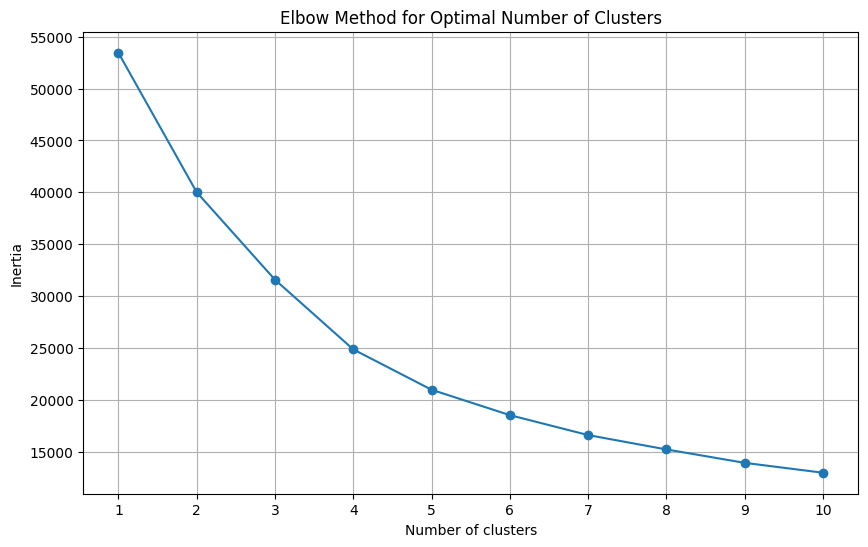

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(features_for_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Perform k-means clustering

### Subtask:
Apply the K-means algorithm with the chosen number of clusters.


**Reasoning**:
Apply KMeans with 4 clusters and add the labels to the original dataframe.



In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans with 4 clusters and random_state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model to the scaled features
kmeans.fit(features_for_clustering_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original cleaned DataFrame
df_cleaned['cluster_label'] = cluster_labels

# Display the head of the DataFrame to verify the new column
display(df_cleaned.head())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category_Arts,course_category_Business,course_category_Humanities,course_category_STEM,cluster_label
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,1.0,0.0,0.0,0.0,1
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,0.0,0.0,1.0,0.0,1
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,0.0,0.0,0.0,1.0,0
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,1.0,0.0,0.0,0.0,2
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,0.0,0.0,1.0,0.0,1


## Evaluate clustering (silhouette score)

### Subtask:
Calculate the silhouette score to evaluate the clustering performance.


**Reasoning**:
Calculate and print the silhouette score to evaluate the clustering performance.



In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(features_for_clustering_scaled, df_cleaned['cluster_label'])

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.2777768588869127


## Evaluate clustering (completion rate kpi)

### Subtask:
Calculate the completion rate KPI for each cluster.


**Reasoning**:
Calculate the mean completion status for each cluster label in the df_cleaned DataFrame and display the result.



In [ ]:
# Calculate the completion rate (mean of completion_status) for each cluster
completion_rate_by_cluster = df_cleaned.groupby('cluster_label')['completion_status'].mean()

# Display the completion rate for each cluster
print("Completion Rate by Cluster:")
display(completion_rate_by_cluster)

Completion Rate by Cluster:


,completion_status
cluster_label,
0,0.743618
1,0.749143
2,0.747685
3,0.753794


## Visualize clusters

### Subtask:
Visualize the clusters (e.g., using scatter plots).


**Reasoning**:
Create scatter plots to visualize the clusters using pairs of the clustering features and color-code the points by cluster label.



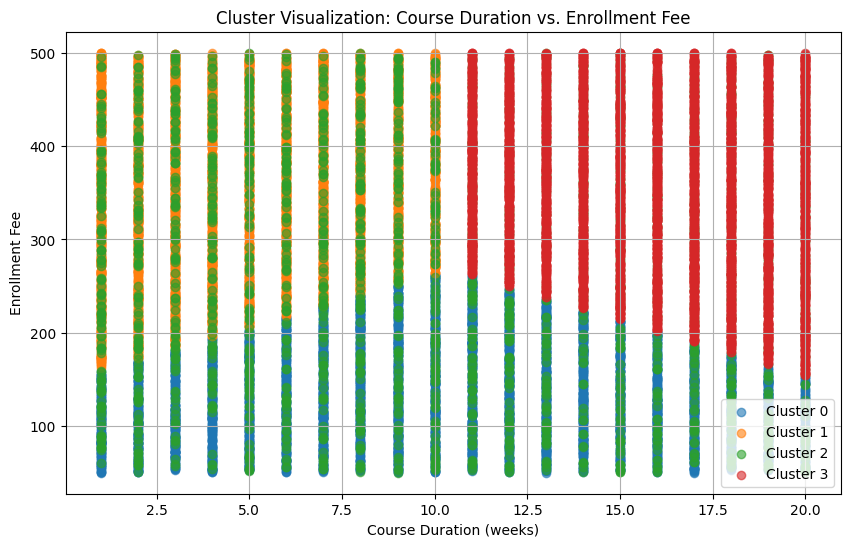

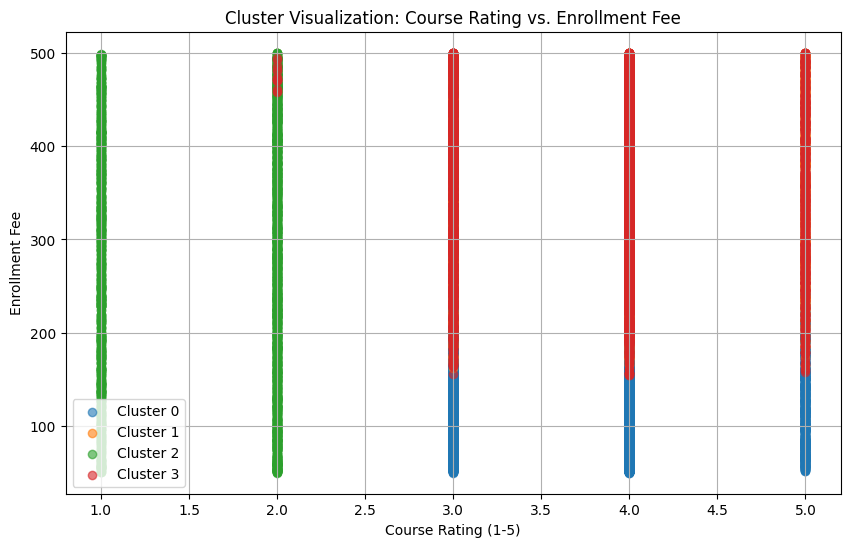

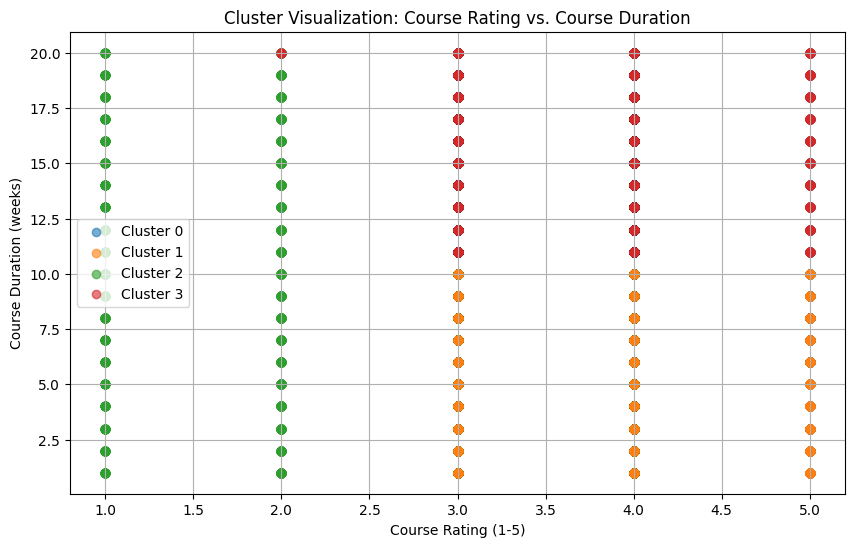

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot for 'course_duration' vs. 'enrollment_fee'
plt.figure(figsize=(10, 6))
for cluster in sorted(df_cleaned['cluster_label'].unique()):
    cluster_data = df_cleaned[df_cleaned['cluster_label'] == cluster]
    plt.scatter(cluster_data['course_duration'], cluster_data['enrollment_fee'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Course Duration (weeks)')
plt.ylabel('Enrollment Fee')
plt.title('Cluster Visualization: Course Duration vs. Enrollment Fee')
plt.legend()
plt.grid(True)
plt.show()

# Create scatter plot for 'course_rating' vs. 'enrollment_fee'
plt.figure(figsize=(10, 6))
for cluster in sorted(df_cleaned['cluster_label'].unique()):
    cluster_data = df_cleaned[df_cleaned['cluster_label'] == cluster]
    plt.scatter(cluster_data['course_rating'], cluster_data['enrollment_fee'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Course Rating (1-5)')
plt.ylabel('Enrollment Fee')
plt.title('Cluster Visualization: Course Rating vs. Enrollment Fee')
plt.legend()
plt.grid(True)
plt.show()

# Create scatter plot for 'course_rating' vs. 'course_duration'
plt.figure(figsize=(10, 6))
for cluster in sorted(df_cleaned['cluster_label'].unique()):
    cluster_data = df_cleaned[df_cleaned['cluster_label'] == cluster]
    plt.scatter(cluster_data['course_rating'], cluster_data['course_duration'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Course Rating (1-5)')
plt.ylabel('Course Duration (weeks)')
plt.title('Cluster Visualization: Course Rating vs. Course Duration')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The optimal number of clusters determined by the elbow method is 4.
*   The silhouette score for the 4-cluster solution is approximately 0.278.
*   The completion rates across the four clusters are relatively similar, ranging from approximately 0.744 to 0.754. Specifically, Cluster 0 has a completion rate of 0.744, Cluster 1 has 0.749, Cluster 2 has 0.748, and Cluster 3 has 0.754.

### Insights or Next Steps

*   Although the clusters were identified based on course features, the similar completion rates suggest that these specific features ('course_rating', 'course_duration', 'enrollment_fee') might not be strong differentiators for course completion. Further analysis could involve incorporating other features (e.g., learner engagement metrics, course category) to potentially identify clusters with more distinct completion rate profiles.
*   Explore the characteristics (average course rating, duration, and enrollment fee) of each identified cluster to understand what defines each group of courses. This can help in tailoring strategies for marketing or course improvement based on cluster profiles.


In [ ]:
import pandas as pd

df_cleaned = pd.read_csv('cleaned_course_effectiveness.csv')
display(df_cleaned.head())
display(df_cleaned.info())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category_Arts,course_category_Business,course_category_Humanities,course_category_STEM
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,1.0,0.0,0.0,0.0
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,0.0,0.0,1.0,0.0
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,0.0,0.0,0.0,1.0
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,1.0,0.0,0.0,0.0
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,0.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17817 entries, 0 to 17816
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_id                   16044 non-null  object 
 1   student_id                  16054 non-null  object 
 2   enrollment_date             16025 non-null  object 
 3   completion_status           16038 non-null  float64
 4   course_rating               17817 non-null  float64
 5   course_duration             17817 non-null  float64
 6   enrollment_fee              16028 non-null  float64
 7   student_satisfaction_score  16039 non-null  float64
 8   course_category_Arts        17817 non-null  float64
 9   course_category_Business    17817 non-null  float64
 10  course_category_Humanities  17817 non-null  float64
 11  course_category_STEM        17817 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.6+ MB


None

In [ ]:
features_for_clustering = df_cleaned[['course_rating', 'course_duration', 'enrollment_fee']]
display(features_for_clustering.head())

,course_rating,course_duration,enrollment_fee
0,3.0,9.0,377.10
1,5.0,3.0,497.59
2,3.0,3.0,67.63
3,2.0,12.0,224.00
4,4.0,6.0,444.70


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Check for missing values in the selected features
print("Missing values before handling:")
print(features_for_clustering.isnull().sum())

# Handle missing values by imputing with the median
for col in features_for_clustering.columns:
    if features_for_clustering[col].isnull().sum() > 0:
        median_value = features_for_clustering[col].median()
        features_for_clustering[col].fillna(median_value, inplace=True)

print("\nMissing values after handling:")
print(features_for_clustering.isnull().sum())

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Convert scaled features back to a DataFrame for easier handling
features_for_clustering_scaled = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

display(features_for_clustering_scaled.head())

Missing values before handling:
course_rating         0
course_duration       0
enrollment_fee     1789
dtype: int64

Missing values after handling:
course_rating      0
course_duration    0
enrollment_fee     0
dtype: int64


/tmp/ipython-input-1707184877.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_for_clustering[col].fillna(median_value, inplace=True)
/tmp/ipython-input-1707184877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering[col].fillna(median_value, inplace=True)


,course_rating,course_duration,enrollment_fee
0,-0.551386,-0.261737,0.827650
1,1.488278,-1.298580,1.801945
2,-0.551386,-1.298580,-1.674756
3,-1.571218,0.256684,-0.410332
4,0.468446,-0.780159,1.374271


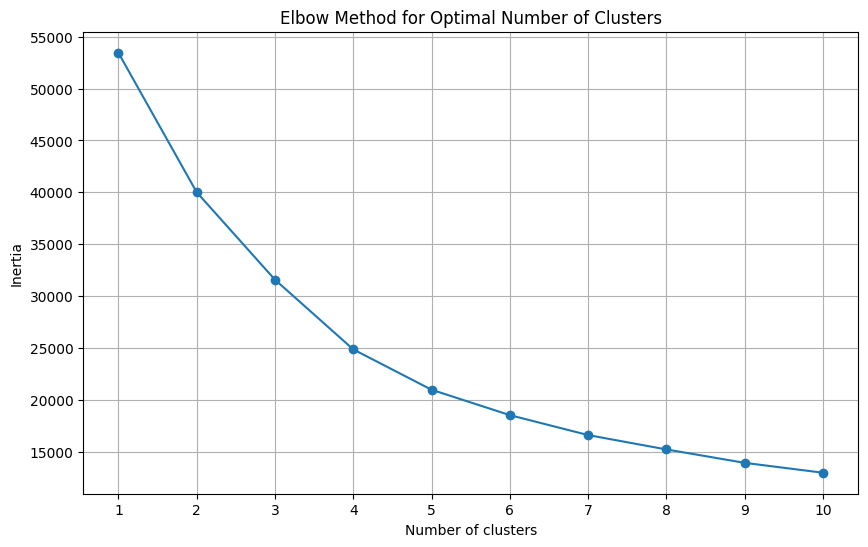

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(features_for_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans with 4 clusters and random_state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model to the scaled features
kmeans.fit(features_for_clustering_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original cleaned DataFrame
df_cleaned['cluster_label'] = cluster_labels

# Display the head of the DataFrame to verify the new column
display(df_cleaned.head())

,course_id,student_id,enrollment_date,completion_status,course_rating,course_duration,enrollment_fee,student_satisfaction_score,course_category_Arts,course_category_Business,course_category_Humanities,course_category_STEM,cluster_label
0,a91daac2-c022-47bf-9b4e-a07cfee389f2,877e0506-1020-41e0-a57d-25ab76aac448,2023-08-09,1.0,3.0,9.0,377.10,4.0,1.0,0.0,0.0,0.0,1
1,4efe0b20-bfb0-4d3a-b5f6-39624f84f5aa,06add0ac-4f11-4e3a-b4f7-80e6cffb1879,NaN,1.0,5.0,3.0,497.59,2.0,0.0,0.0,1.0,0.0,1
2,NaN,b856ca3e-eeb2-4280-b897-b306aecaf695,2024-02-14,1.0,3.0,3.0,67.63,5.0,0.0,0.0,0.0,1.0,0
3,72013b53-25ec-4ef3-9d30-c926443b9df3,83916b8d-d968-4e13-99e8-1aaf805efdc3,2024-02-03,0.0,2.0,12.0,224.00,5.0,1.0,0.0,0.0,0.0,2
4,7ba56ea2-653c-4de2-a8ce-767be1f9a1f5,5065caa5-b3f2-4e8d-bb5f-45f7bc117c76,2024-09-12,1.0,4.0,6.0,444.70,2.0,0.0,0.0,1.0,0.0,1


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(features_for_clustering_scaled, df_cleaned['cluster_label'])

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.2777768588869127


In [ ]:
# Calculate the completion rate (mean of completion_status) for each cluster
completion_rate_by_cluster = df_cleaned.groupby('cluster_label')['completion_status'].mean()

# Display the completion rate for each cluster
print("Completion Rate by Cluster:")
display(completion_rate_by_cluster)

Completion Rate by Cluster:


,completion_status
cluster_label,
0,0.743618
1,0.749143
2,0.747685
3,0.753794


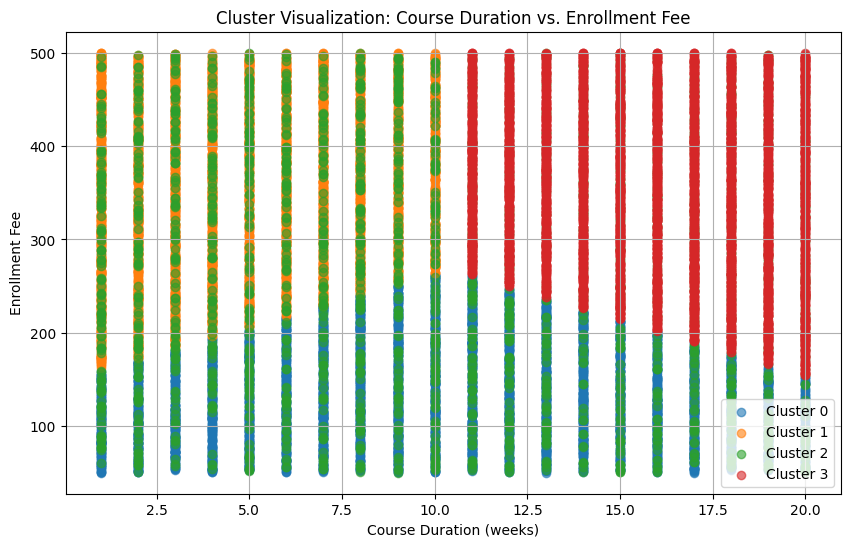

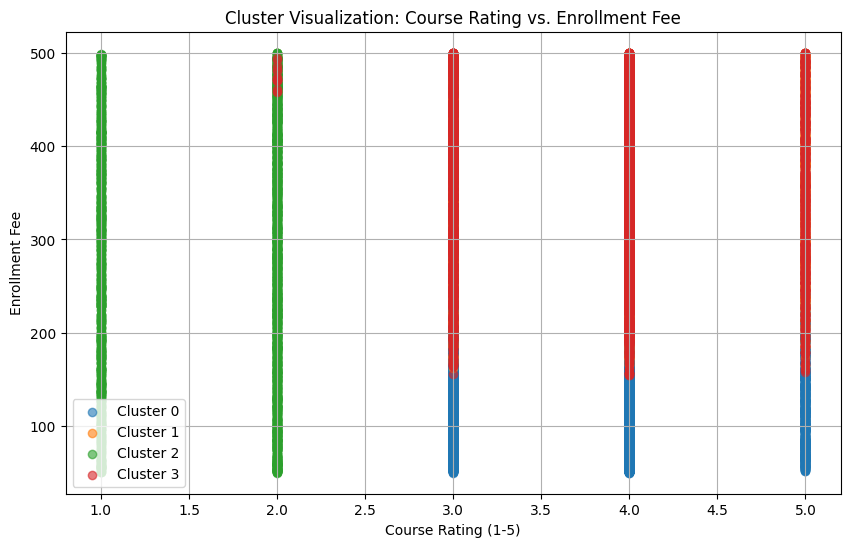

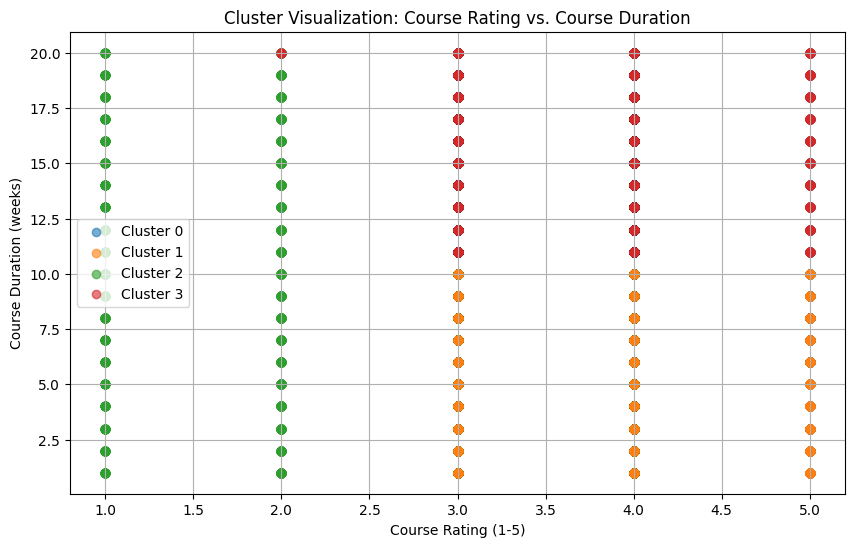

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot for 'course_duration' vs. 'enrollment_fee'
plt.figure(figsize=(10, 6))
for cluster in sorted(df_cleaned['cluster_label'].unique()):
    cluster_data = df_cleaned[df_cleaned['cluster_label'] == cluster]
    plt.scatter(cluster_data['course_duration'], cluster_data['enrollment_fee'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Course Duration (weeks)')
plt.ylabel('Enrollment Fee')
plt.title('Cluster Visualization: Course Duration vs. Enrollment Fee')
plt.legend()
plt.grid(True)
plt.show()

# Create scatter plot for 'course_rating' vs. 'enrollment_fee'
plt.figure(figsize=(10, 6))
for cluster in sorted(df_cleaned['cluster_label'].unique()):
    cluster_data = df_cleaned[df_cleaned['cluster_label'] == cluster]
    plt.scatter(cluster_data['course_rating'], cluster_data['enrollment_fee'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Course Rating (1-5)')
plt.ylabel('Enrollment Fee')
plt.title('Cluster Visualization: Course Rating vs. Enrollment Fee')
plt.legend()
plt.grid(True)
plt.show()

# Create scatter plot for 'course_rating' vs. 'course_duration'
plt.figure(figsize=(10, 6))
for cluster in sorted(df_cleaned['cluster_label'].unique()):
    cluster_data = df_cleaned[df_cleaned['cluster_label'] == cluster]
    plt.scatter(cluster_data['course_rating'], cluster_data['course_duration'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Course Rating (1-5)')
plt.ylabel('Course Duration (weeks)')
plt.title('Cluster Visualization: Course Rating vs. Course Duration')
plt.legend()
plt.grid(True)
plt.show()